In [153]:
import pandas as pd
import numpy as np
import sqlite3

# Pulling data and basic cleaning

## Pulling data

In [154]:
data=pd.read_csv("../raw_data/Meteo/donnees-synop-essentielles-omm.csv", sep=";")

In [155]:
df_dpts = pd.read_excel("../raw_data/Meteo/Classement_Departement.xlsx")

In [156]:
df_cleaning = pd.read_excel("../raw_data/Meteo/Meteo_Cleaning.xlsx", sheet_name="Features")

In [157]:
df_soil_cleaning = pd.read_excel('../raw_data/Meteo/Meteo_Cleaning.xlsx', sheet_name="Soil")

## Cleaning df_dpts

In [158]:
df_dpts = df_dpts.dropna() 

In [159]:
df_dpts["ID OMM station"] = df_dpts["ID OMM station"].astype('int')

## Filtering down df_cleaning

In [160]:
df_cleaning = df_cleaning[df_cleaning['keep']==1]

In [161]:
df_type_dict = pd.Series(df_cleaning.type.values, df_cleaning.feature_clean_name.values).to_dict()

In [162]:
df_cleaning

,feature_excel_name,keep,feature_clean_name,metrics,aggregation,notes,type
0,ID OMM station,1.0,region_id,NaN,key,NaN,int32
1,Date,1.0,date_raw,YYYY-MM-DDTHH:MM:SS+HH:MM,key,NaN,str
2,Point de rosée,1.0,rose_point,K,mean,NaN,float32
3,Humidité,1.0,humidity,%,mean,NaN,float32
4,Variation de pression en 24 heures,1.0,pressure_var_24,Pa?,mean,Niveau barométrique et pression station en Pa,int64
5,Etat du sol,1.0,soil_state_raw,Code (0901),mean,NaN,float32
6,"Hauteur totale de la couche de neige, glace, a...",1.0,h_snow_plus,metre,max,NaN,float32
7,Hauteur de la neige fraîche,1.0,h_snow_fresh,metre,max,NaN,float32
8,Précipitations dans les 24 dernières heures,1.0,rain_24,mm,sum,NaN,float32
9,Nom,1.0,city,NaN,key,NaN,str


## Cleaning df

In [163]:
df = data[data["ID OMM station"].isin(list(df_dpts["ID OMM station"]))]
df = df.reset_index(drop=True)

In [164]:
del data

In [165]:
df = df[list(df_cleaning['feature_excel_name'])]

In [166]:
df.columns = list(df_cleaning['feature_clean_name'])

In [167]:
df['year'] = df['date_raw'].str[:4]
df['month'] = df['date_raw'].str[5:7]
df['day'] = df['date_raw'].str[8:10]
df['hour'] = df['date_raw'].str[11:13]

In [168]:
df['date_clean'] = pd.to_datetime(df['year']+df['month']+df['day'])

In [169]:
df

,region_id,date_raw,rose_point,humidity,pressure_var_24,soil_state_raw,h_snow_plus,h_snow_fresh,rain_24,city,temp,year,month,day,hour,date_clean
0,7027,2013-04-03T20:00:00+02:00,272.75,73.0,NaN,NaN,0.0,NaN,NaN,CAEN-CARPIQUET,277.15,2013,04,03,20,2013-04-03
1,7181,2013-04-03T20:00:00+02:00,271.15,60.0,NaN,NaN,NaN,NaN,NaN,NANCY-OCHEY,278.25,2013,04,03,20,2013-04-03
2,7207,2013-04-03T23:00:00+02:00,271.75,69.0,NaN,NaN,NaN,NaN,NaN,BELLE ILE-LE TALUT,276.95,2013,04,03,23,2013-04-03
3,7335,2013-04-03T23:00:00+02:00,269.25,50.0,NaN,NaN,0.0,NaN,NaN,POITIERS-BIARD,278.85,2013,04,03,23,2013-04-03
4,7280,2013-04-05T23:00:00+02:00,274.65,73.0,NaN,NaN,0.0,NaN,NaN,DIJON-LONGVIC,279.15,2013,04,05,23,2013-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768967,7181,2021-07-06T20:00:00+02:00,286.85,84.0,290.0,NaN,NaN,NaN,9.9,NANCY-OCHEY,289.55,2021,07,06,20,2021-07-06
768968,7037,2021-07-07T02:00:00+02:00,284.95,90.0,890.0,NaN,0.0,NaN,3.8,ROUEN-BOOS,286.55,2021,07,07,02,2021-07-07
768969,7005,2021-07-07T05:00:00+02:00,286.35,96.0,990.0,0.0,NaN,NaN,1.0,ABBEVILLE,286.95,2021,07,07,05,2021-07-07
768970,7130,2021-07-06T08:00:00+02:00,284.45,81.0,-340.0,0.0,0.0,NaN,11.3,RENNES-ST JACQUES,287.65,2021,07,06,08,2021-07-06


In [170]:
df_cleaning

,feature_excel_name,keep,feature_clean_name,metrics,aggregation,notes,type
0,ID OMM station,1.0,region_id,NaN,key,NaN,int32
1,Date,1.0,date_raw,YYYY-MM-DDTHH:MM:SS+HH:MM,key,NaN,str
2,Point de rosée,1.0,rose_point,K,mean,NaN,float32
3,Humidité,1.0,humidity,%,mean,NaN,float32
4,Variation de pression en 24 heures,1.0,pressure_var_24,Pa?,mean,Niveau barométrique et pression station en Pa,int64
5,Etat du sol,1.0,soil_state_raw,Code (0901),mean,NaN,float32
6,"Hauteur totale de la couche de neige, glace, a...",1.0,h_snow_plus,metre,max,NaN,float32
7,Hauteur de la neige fraîche,1.0,h_snow_fresh,metre,max,NaN,float32
8,Précipitations dans les 24 dernières heures,1.0,rain_24,mm,sum,NaN,float32
9,Nom,1.0,city,NaN,key,NaN,str


## Cleaning soil state

In [171]:
df['pressure_var_24'].value_counts()

-50.0      3637
-90.0      3627
-100.0     3606
-60.0      3602
-110.0     3580
           ... 
 3730.0       1
 3700.0       1
-4070.0       1
 3820.0       1
-3510.0       1
Name: pressure_var_24, Length: 805, dtype: int64

In [172]:
df = df.merge(df_soil_cleaning, on="soil_state_raw")

In [173]:
df = df.drop(columns="soil_state_raw")

## Reducing down to Jan-March

In [174]:
df['month'] = df['month'].astype(int)

In [175]:
df = df[(df['month']<3) | (df['month']>=9)]

# Aggregation

## Temperature

Create min and max temp columns from temp

Identical here but will be aggregated differently

In [176]:
df['tmin_24_c'] = df['temp'] + 273.15
df['tmax_24_c'] = df['temp'] + 273.15

In [177]:
df = df.drop(columns='temp')

## Cleaning columns

In [178]:
df = df.drop(columns="city")
df = df.drop(columns = ['date_raw', 'year','month','day','hour'])

In [179]:
df.columns

Index(['region_id', 'rose_point', 'humidity', 'pressure_var_24', 'h_snow_plus',
       'h_snow_fresh', 'rain_24', 'date_clean', 'soil_state_clean',
       'tmin_24_c', 'tmax_24_c'],
      dtype='object')

## Creating an aggregation dict

In [180]:
df_agg_dict = pd.Series(df_cleaning.aggregation.values, df_cleaning.feature_clean_name.values).to_dict()
del df_agg_dict['date_raw']
del df_agg_dict['region_id']
del df_agg_dict['city']
del df_agg_dict['soil_state_raw']
del df_agg_dict['temp']
df_agg_dict['soil_state_clean'] = "max"
df_agg_dict['tmin_24_c']="min"
df_agg_dict['tmax_24_c']="max"

In [181]:
df_agg_dict

{'rose_point': 'mean',
 'humidity': 'mean',
 'pressure_var_24': 'mean',
 'h_snow_plus': 'max',
 'h_snow_fresh': 'max',
 'rain_24': 'sum',
 'soil_state_clean': 'max',
 'tmin_24_c': 'min',
 'tmax_24_c': 'max'}

In [182]:
df_meteo = df.groupby(["date_clean",'region_id']).agg(df_agg_dict)
df_meteo = df_meteo.reset_index()

In [183]:
df_meteo.to_excel("../raw_data/Meteo/test_meteo.xlsx", index=False)

# Exploration

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

## NAs

In [88]:
df.columns

Index(['region_id', 'rose_point', 'humidity', 'pressure_var_24', 'h_snow_plus',
       'h_snow_fresh', 'rain_24', 'date_clean', 'soil_state_clean',
       'tmin_24_c', 'tmax_24_c'],
      dtype='object')

In [89]:
df.isna().sum()

region_id                0
rose_point             376
humidity               369
pressure_var_24      34781
h_snow_plus          44392
h_snow_fresh        299527
rain_24               8966
date_clean               0
soil_state_clean         0
tmin_24_c              133
tmax_24_c              133
dtype: int64

In [118]:
df_meteo.count()

date_clean          76228
region_id           76228
rose_point          76153
humidity            76154
pressure_var_24     46290
h_snow_plus         68194
h_snow_fresh        23028
rain_24             76228
soil_state_clean    76228
tmin_24_c           76201
tmax_24_c           76201
month               76228
h_snow_na           76228
dtype: int64

In [119]:
8000/76000

0.10526315789473684

In [90]:
df_meteo.isna().sum()

rose_point             75
humidity               74
pressure_var_24     29938
h_snow_plus          8034
h_snow_fresh        53200
rain_24                 0
soil_state_clean        0
tmin_24_c              27
tmax_24_c              27
dtype: int64

In [92]:
df_meteo = df_meteo.reset_index()

In [98]:
df_meteo['month'] = df_meteo['date_clean'].astype(str).str[5:7]

In [104]:
df_meteo['h_snow_na'] = df_meteo['h_snow_plus'].isna()*1

In [105]:
df_meteo['month']

0        01
1        01
2        01
3        01
4        01
         ..
76223    02
76224    02
76225    02
76226    02
76227    02
Name: month, Length: 76228, dtype: object

In [106]:
df_meteo['h_snow_na']

0        0
1        0
2        0
3        0
4        0
        ..
76223    0
76224    1
76225    0
76226    0
76227    0
Name: h_snow_na, Length: 76228, dtype: int64

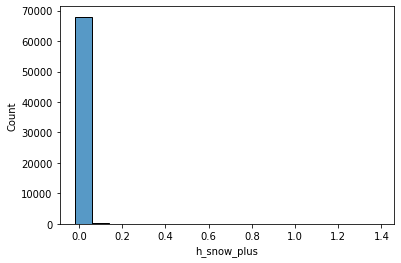

In [120]:
sns.histplot(df_meteo['h_snow_plus']);

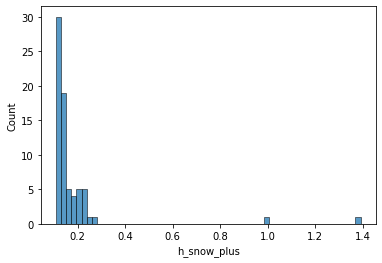

In [117]:
sns.histplot(df_meteo[df_meteo['h_snow_plus']>0.1]['h_snow_plus']);

/home/wenfangzh/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='h_snow_na'>

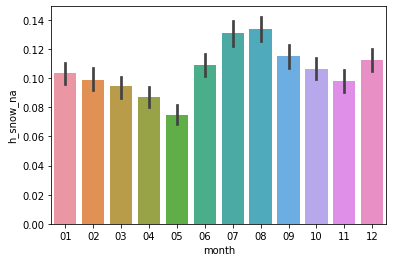

In [110]:
sns.barplot(df_meteo["month"], df_meteo["h_snow_na"])

## One region

In [ ]:
df7005 = df[df['region_id']==7005].reset_index(drop=True)

In [ ]:
df7005.sort_values(by="date_clean")

In [ ]:
tmp = df7005["hour"].unique()
tmp.sort()
tmp

In [ ]:
df7005['date_clean'].nunique()

In [ ]:
len(tmp)/2

In [ ]:
4435*8

Missing very little data

In [ ]:
df7005['soil_state'].sum()

In [ ]:
df7005['soil_state'].value_counts()

In [ ]:
ets = df7005.groupby('date_clean').max()['soil_state']

In [ ]:
ets.count()

In [ ]:
ets.value_counts().sort_index()

## Soil state across regions

In [ ]:
df_grp = df.groupby(['region_id', 'date_clean']).max()

In [ ]:
df_grp.groupby('region_id').count()['soil_state'].sort_values()

In [ ]:
df_100k_clean.groupby("ID OMM station").count()["Etat du sol"].sort_values(ascending=False)

In [ ]:
df_grp['soil_state']